# Notebook for testing showCamera.
Initially written 09 Mar 2020 by Craig Lage.\
Testing w_2020_35 code.

In [1]:
! eups list -s | grep lsst_distrib
! eups list -s | grep obs_lsst

ERROR: ld.so: object '/etc/alternatives/java_sdk_openjdk/jre/lib/amd64/libjsig.so' from LD_PRELOAD cannot be preloaded: ignored.
ERROR: ld.so: object '/etc/alternatives/java_sdk_openjdk/jre/lib/amd64/libjsig.so' from LD_PRELOAD cannot be preloaded: ignored.
ERROR: ld.so: object '/etc/alternatives/java_sdk_openjdk/jre/lib/amd64/libjsig.so' from LD_PRELOAD cannot be preloaded: ignored.
lsst_distrib          19.0.0-1-gc154f85+81 	current w_2020_25 setup
ERROR: ld.so: object '/etc/alternatives/java_sdk_openjdk/jre/lib/amd64/libjsig.so' from LD_PRELOAD cannot be preloaded: ignored.
ERROR: ld.so: object '/etc/alternatives/java_sdk_openjdk/jre/lib/amd64/libjsig.so' from LD_PRELOAD cannot be preloaded: ignored.
ERROR: ld.so: object '/etc/alternatives/java_sdk_openjdk/jre/lib/amd64/libjsig.so' from LD_PRELOAD cannot be preloaded: ignored.
obs_lsst              19.0.0-71-gc490c78 	current w_2020_25 setup
obs_lsst_data         19.0.0-3-g62ccb58 	current w_2020_25 setup


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lsst.daf.persistence import Butler
import lsst.afw.cameraGeom.utils as camGeomUtils
import lsst.afw.display as afwDisplay

In [3]:
def myCallback(im, ccd, imageSource):
    """Assemble the CCD image.  Just bias subtraction and gain correction"""
    oim = camGeomUtils.rawCallback(im, ccd, imageSource,
                                       subtractBias=True, correctGain=True)
    return oim

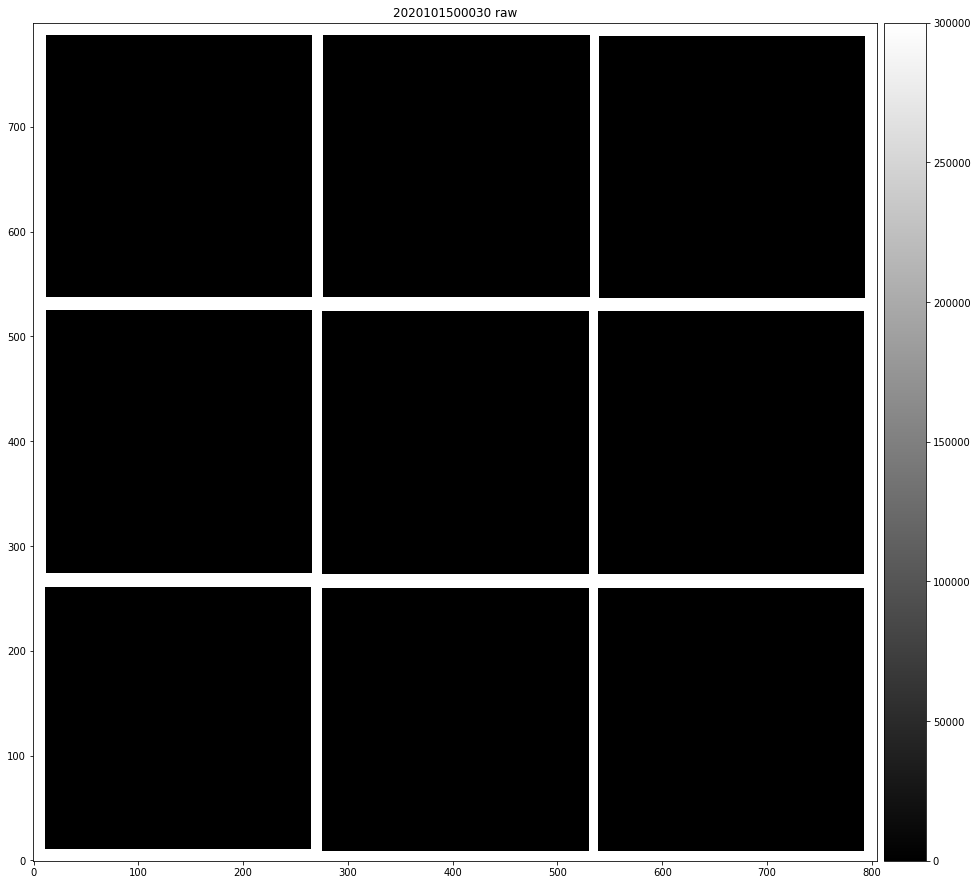

In [12]:
REPO_DIR = '/readonly/comcam/oods/butler/repo'
#REPO_DIR = '/lsstdata/offline/teststand/comcam/Archiver/gen2repo'
#REPO_DIR = '/lsstdata/offline/teststand/comcam/CCS/gen2repo'
#REPO_DIR = '/lsstdata/offline/teststand/NCSA_comcam/gen2repo'


butler = Butler(REPO_DIR)
#visit = 2020091400030
visits = butler.queryMetadata('raw','expId')
visit = visits[-1]

#print(visit)

dataId = dict(expId=visit)
camera = butler.get('camera')

fig = plt.figure(figsize=(16,16))
disp = afwDisplay.Display(1, "matplotlib")
disp.scale('linear', 0, max=300000)

dataType='raw'
mos = camGeomUtils.showCamera(camera, \
                              camGeomUtils.ButlerImage(butler, dataType, expId=dataId["expId"], \
#                                                        verbose=False, callback = myCallback,\
                                                        verbose=False, callback = camGeomUtils.rawCallback,\
                                                      background = np.nan),\
                              binSize=16, detectorNameList=[0,1,2,3,4,5,6,7,8], display=disp, overlay=False, \
#                              binSize=16, display=disp, overlay=False, \
                              title="%d %s" % (visit, dataType))
#fig.savefig(REPO_DIR+'plots/Pinhole_w_2020_13_04Apr20.png')

In [8]:
print(repr("Available run,day,visit,testType,imageType,exptime:"))
exposures=butler.queryMetadata('raw', ['run','dayObs','testType','imageType','exptime','expId'],run='unknown')
for i in range(0,len(exposures)):
    print(exposures[i])


'Available run,day,visit,testType,imageType,exptime:'
('unknown', '2020-07-27', 'BIAS', 'BIAS', 0.0, 2020072700001)
('unknown', '2020-07-27', 'BIAS', 'BIAS', 0.0, 2020072700002)
('unknown', '2020-07-27', 'BIAS', 'BIAS', 0.0, 2020072700003)
('unknown', '2020-07-27', 'BIAS', 'BIAS', 0.0, 2020072700004)
('unknown', '2020-07-27', 'BIAS', 'BIAS', 0.0, 2020072700005)
('unknown', '2020-07-27', 'BIAS', 'BIAS', 0.0, 2020072700006)
('unknown', '2020-07-27', 'BIAS', 'BIAS', 0.0, 2020072700007)
('unknown', '2020-07-27', 'BIAS', 'BIAS', 0.0, 2020072700008)
('unknown', '2020-07-27', 'BIAS', 'BIAS', 0.0, 2020072700011)
('unknown', '2020-07-27', 'BIAS', 'BIAS', 0.0, 2020072700012)
('unknown', '2020-07-27', 'DARK', 'DARK', 100.0, 2020072700013)
('unknown', '2020-07-27', 'DARK', 'DARK', 100.0, 2020072700014)
('unknown', '2020-07-27', 'DARK', 'DARK', 100.0, 2020072700015)
('unknown', '2020-07-27', 'DARK', 'DARK', 100.0, 2020072700016)
('unknown', '2020-07-27', 'DARK', 'DARK', 100.0, 2020072700017)
('unkn